# SHAP for Linear Models

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
file_name = 'wine.csv'

In [3]:
# Chech if the file exists in the current directory
try:
    wine = pd.read_csv(file_name)
except FileNotFoundError:
    print(f'Downloading {file_name} from {url}')
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(file_name, index=False)
    print('Download complete!')

## EDA

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08


In [13]:
wine.corr().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121,-0.114
volatile acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068,-0.195
citric acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.150,-0.164,0.062,-0.076,-0.009
residual sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.027,-0.451,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360,-0.210
free sulfur dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.616,0.294,-0.001,0.059,-0.250,0.008
total sulfur dioxide,0.091,0.089,0.121,0.401,0.199,0.616,1.000,0.530,0.002,0.135,-0.449,-0.175
density,0.265,0.027,0.150,0.839,0.257,0.294,0.530,1.000,-0.094,0.074,-0.780,-0.307
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-0.001,0.002,-0.094,1.000,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.027,0.017,0.059,0.135,0.074,0.156,1.000,-0.017,0.054


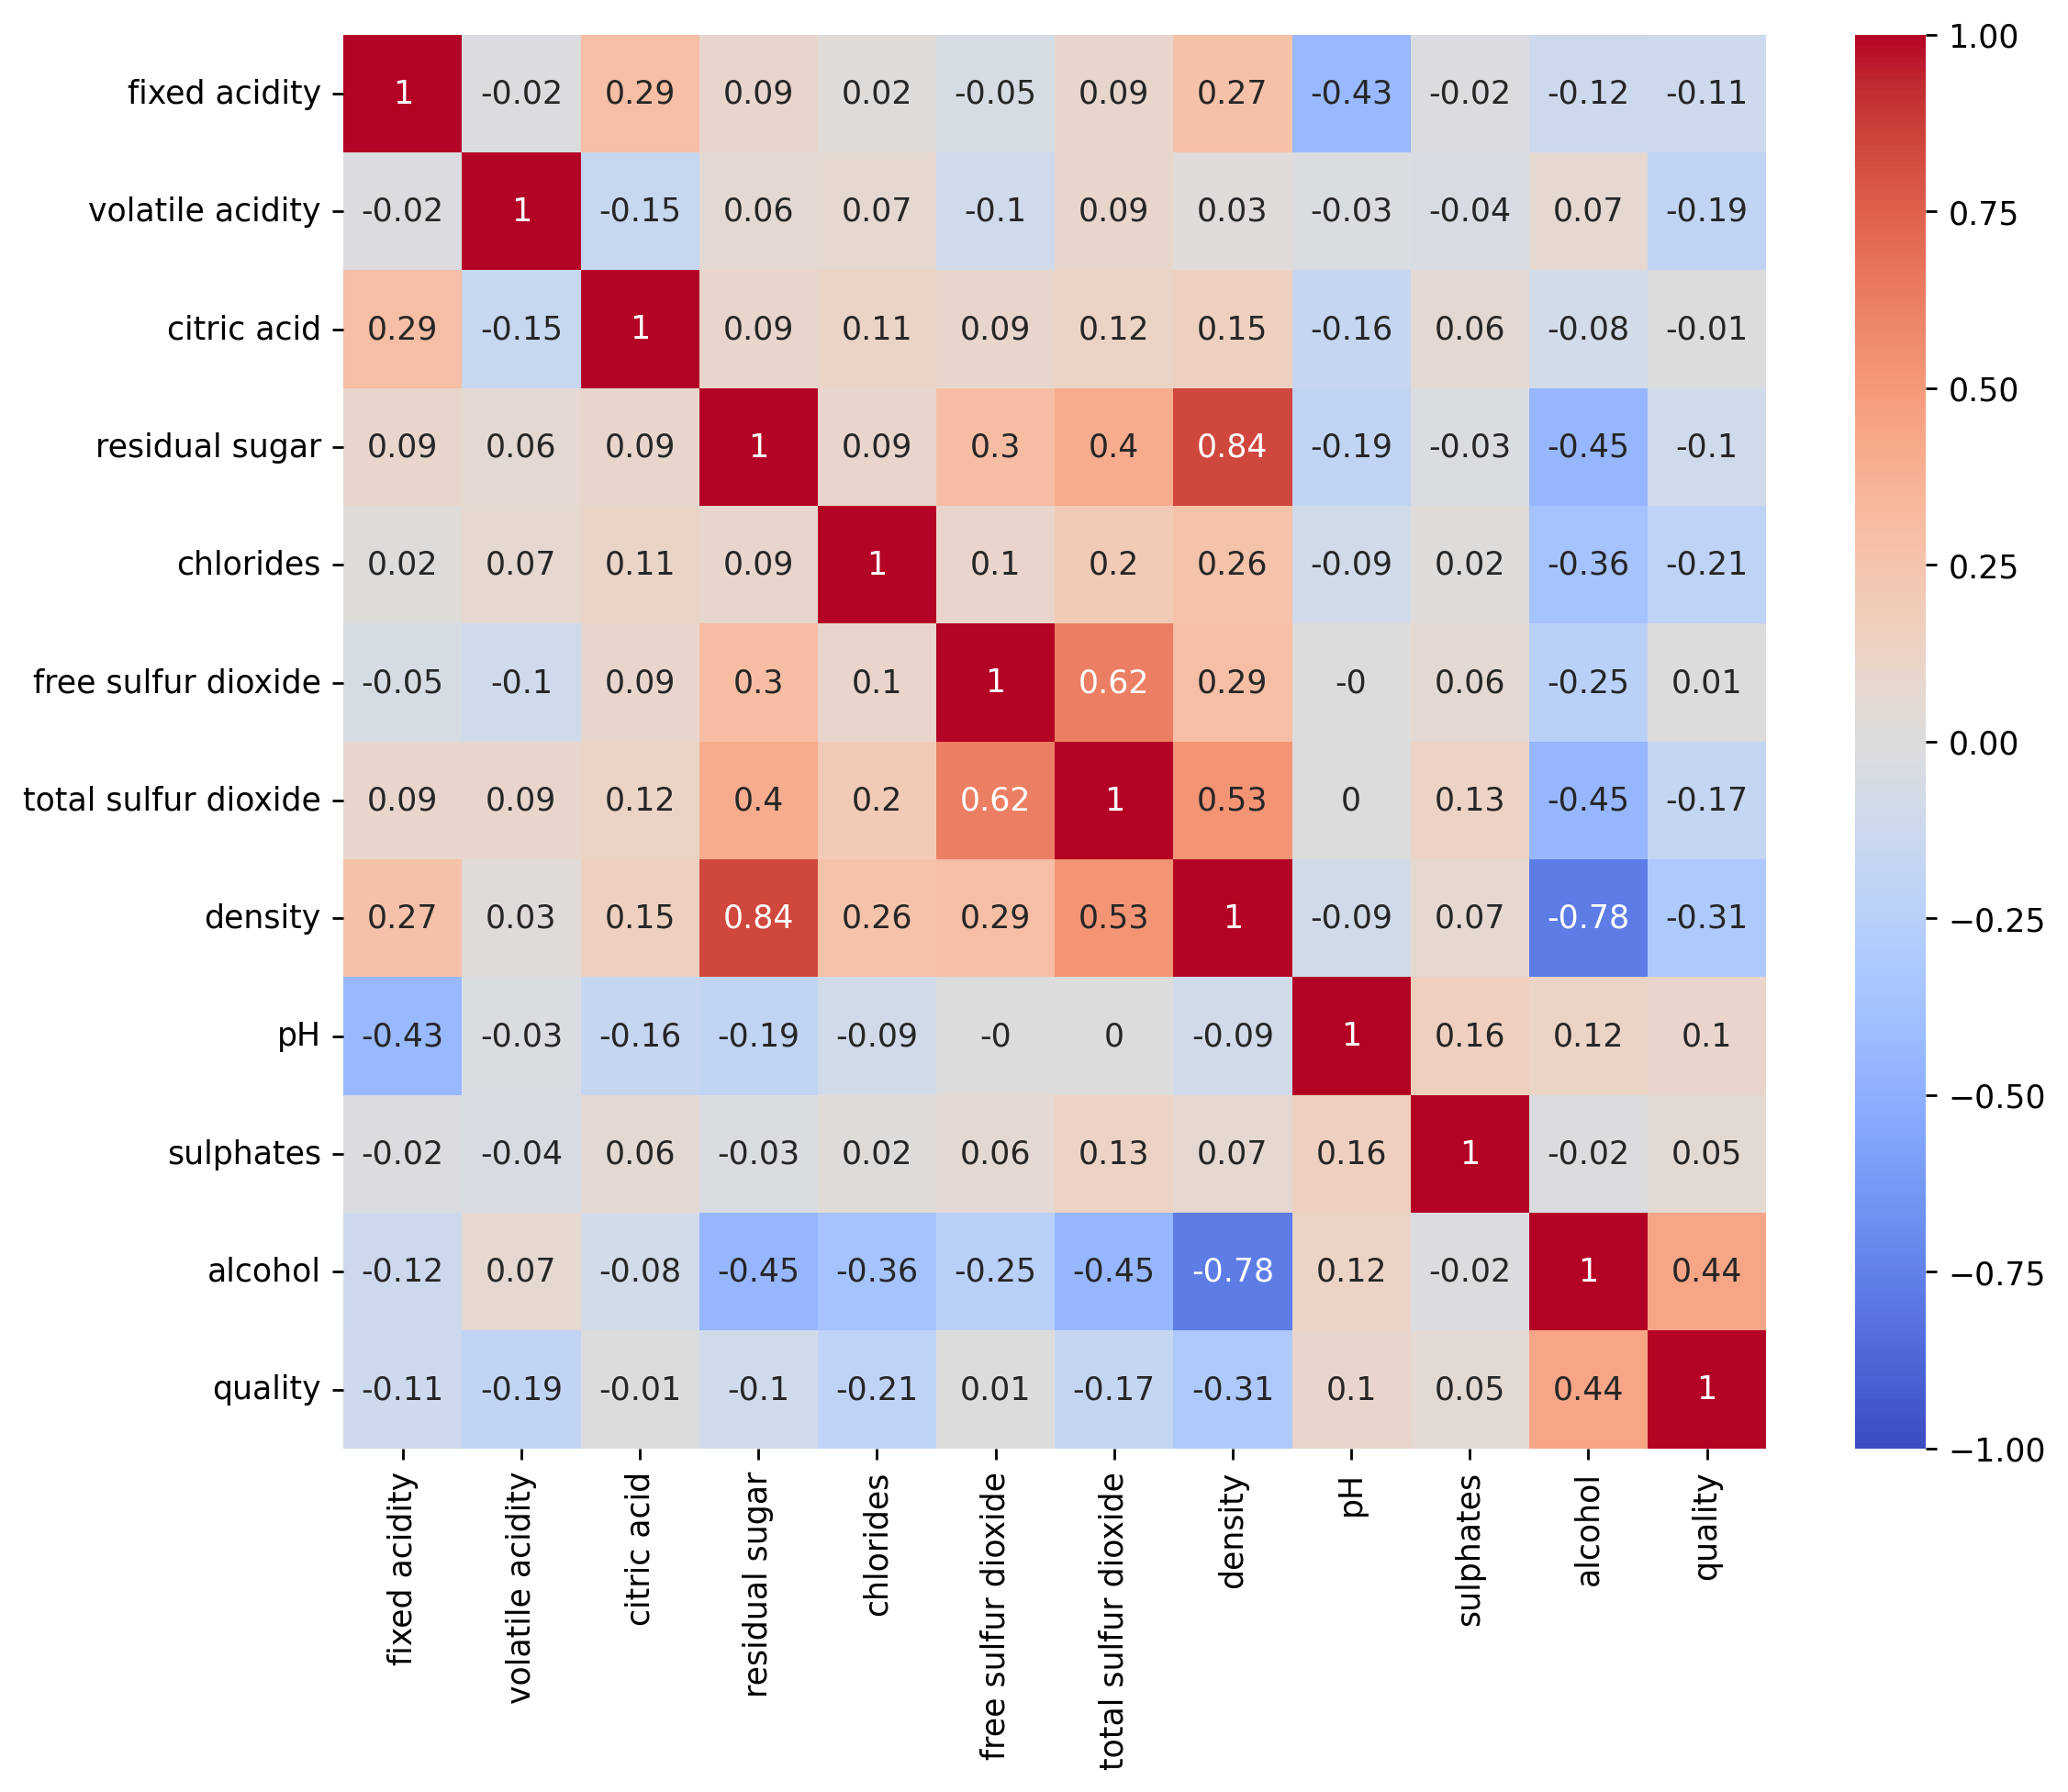

In [12]:
plt.figure(figsize=(10,8), dpi=250)
sns.heatmap(data=wine.corr().round(2), cmap="coolwarm", vmin=-1, vmax=1, annot=True);

In [17]:
summary = wine.describe().transpose().round(2)
summary = summary.drop("count", axis=1)

# Create a markdown table
markdown_table = tabulate(summary, headers='keys', tablefmt='pipe')
print(markdown_table)

|                      |   mean |   std |   min |    25% |    50% |    75% |    max |
|:---------------------|-------:|------:|------:|-------:|-------:|-------:|-------:|
| fixed acidity        |   6.85 |  0.84 |  3.8  |   6.3  |   6.8  |   7.3  |  14.2  |
| volatile acidity     |   0.28 |  0.1  |  0.08 |   0.21 |   0.26 |   0.32 |   1.1  |
| citric acid          |   0.33 |  0.12 |  0    |   0.27 |   0.32 |   0.39 |   1.66 |
| residual sugar       |   6.39 |  5.07 |  0.6  |   1.7  |   5.2  |   9.9  |  65.8  |
| chlorides            |   0.05 |  0.02 |  0.01 |   0.04 |   0.04 |   0.05 |   0.35 |
| free sulfur dioxide  |  35.31 | 17.01 |  2    |  23    |  34    |  46    | 289    |
| total sulfur dioxide | 138.36 | 42.5  |  9    | 108    | 134    | 167    | 440    |
| density              |   0.99 |  0    |  0.99 |   0.99 |   0.99 |   1    |   1.04 |
| pH                   |   3.19 |  0.15 |  2.72 |   3.09 |   3.18 |   3.28 |   3.82 |
| sulphates            |   0.49 |  0.11 |  0.22 |   0.

## Fit a Linear Regression Model

In [22]:
# Create X and Y sets and Train Test Split
y = wine['quality']
X = wine.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Linear Regression Model

In [26]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.59
MSE: 0.57
RMSE: 0.75
